In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
airline_frame = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)

In [3]:
airline_frame.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


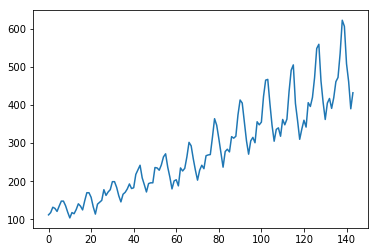

In [4]:
plt.plot(airline_frame)
plt.show()

In [5]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [6]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [7]:
airline_np_array = airline_frame.values
airline_np_array = airline_np_array.astype('float32')

In [8]:
airline_np_array.shape

(144, 1)

In [9]:
airline_np_array[:5]

array([[ 112.],
       [ 118.],
       [ 132.],
       [ 129.],
       [ 121.]], dtype=float32)

In [10]:
#normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
airline_normalized_np_array = scaler.fit_transform(airline_np_array)

In [11]:
airline_normalized_np_array[:5]

array([[ 0.01544401],
       [ 0.02702703],
       [ 0.05405405],
       [ 0.04826255],
       [ 0.03281853]], dtype=float32)

In [12]:
airline_normalized_np_array[0:5,:]

array([[ 0.01544401],
       [ 0.02702703],
       [ 0.05405405],
       [ 0.04826255],
       [ 0.03281853]], dtype=float32)

In [14]:
# split into train and test sets
dataset = airline_normalized_np_array
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(96, 48)


In [15]:
#split into train and test sets
train_size = int(len(airline_normalized_np_array) * 0.67)
test_size = len(airline_normalized_np_array) - train_size
train, test = airline_normalized_np_array[0:train_size:], airline_normalized_np_array[train_size:len(airline_normalized_np_array):]

In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

In [18]:
trainX[:5], trainY[:5]

(array([[ 0.01544401,  0.02702703,  0.05405405],
        [ 0.02702703,  0.05405405,  0.04826255],
        [ 0.05405405,  0.04826255,  0.03281853],
        [ 0.04826255,  0.03281853,  0.05984557],
        [ 0.03281853,  0.05984557,  0.08494207]], dtype=float32),
 array([ 0.04826255,  0.03281853,  0.05984557,  0.08494207,  0.08494207], dtype=float32))

In [19]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [27]:
trainX[:5]

array([[[ 0.01544401,  0.02702703,  0.05405405]],

       [[ 0.02702703,  0.05405405,  0.04826255]],

       [[ 0.05405405,  0.04826255,  0.03281853]],

       [[ 0.04826255,  0.03281853,  0.05984557]],

       [[ 0.03281853,  0.05984557,  0.08494207]]], dtype=float32)

In [21]:
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
0s - loss: 0.0497
Epoch 2/100
0s - loss: 0.0234
Epoch 3/100
0s - loss: 0.0165
Epoch 4/100
0s - loss: 0.0146
Epoch 5/100
0s - loss: 0.0134
Epoch 6/100
0s - loss: 0.0123
Epoch 7/100
0s - loss: 0.0113
Epoch 8/100
0s - loss: 0.0105
Epoch 9/100
0s - loss: 0.0096
Epoch 10/100
0s - loss: 0.0089
Epoch 11/100
0s - loss: 0.0083
Epoch 12/100
0s - loss: 0.0076
Epoch 13/100
0s - loss: 0.0072
Epoch 14/100
0s - loss: 0.0068
Epoch 15/100
0s - loss: 0.0065
Epoch 16/100
0s - loss: 0.0061
Epoch 17/100
0s - loss: 0.0058
Epoch 18/100
0s - loss: 0.0057
Epoch 19/100
0s - loss: 0.0057
Epoch 20/100
0s - loss: 0.0055
Epoch 21/100
0s - loss: 0.0052
Epoch 22/100
0s - loss: 0.0051
Epoch 23/100
0s - loss: 0.0050
Epoch 24/100
0s - loss: 0.0049
Epoch 25/100
0s - loss: 0.0048
Epoch 26/100
0s - loss: 0.0048
Epoch 27/100
0s - loss: 0.0046
Epoch 28/100
0s - loss: 0.0046
Epoch 29/100
0s - loss: 0.0044
Epoch 30/100
0s - loss: 0.0044
Epoch 31/100
0s - loss: 0.0043
Epoch 32/100
0s - loss: 0.0043
Epoch 33/100
0s -

In [23]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.07 RMSE
Test Score: 56.90 RMSE


The original dataset is blue, the predictions for the training dataset are green, and the predictions on the unseen test dataset are red.

In [24]:
dataset = airline_normalized_np_array

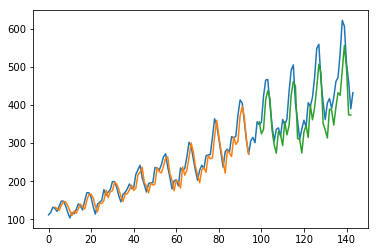

In [25]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()